# Цель лабораторной работы
Изучить сложные способы подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.
# Задание
Требуется выполнить следующие действия:
Выбрать набор данных (датасет) для решения задачи классификации или регресии.
В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
С использованием метода train_test_split разделите выборку на обучающую и тестовую.
Обучите модель ближайших соседей для произвольно заданного гиперпараметра $K$. Оцените качество модели с помощью трех подходящих для задачи метрик.
Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.
Произведите подбор гиперпараметра $K$ с использованием GridSearchCV и кросс-валидации.
Повторите пункт 4 для найденного оптимального значения гиперпараметра $K$. Сравните качество полученной модели с качеством модели, полученной в пункте 4.
Постройте кривые обучения и валидации.
# Ход выполнения работы
Подключим все необходимые библиотеки и настроим отображение графиков:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.impute
import sklearn.preprocessing
import matplotlib.pyplot as plt
# Enable inline plots
%matplotlib inline

# Set plot style
sns.set(style="ticks")
from sklearn.preprocessing import Normalizer

In [22]:
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option("display.width", 70)

# Предварительная подготовка данных

In [3]:

data = pd.read_csv("/Users/elizavetasukach/Desktop/MachineLearning/2019.csv")

проверим типы

In [4]:
data.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [6]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Значения колонки Country or region уникальны, поэтому ее можно удалить, если заменить на цифровые значения, то значения колонки Overall rank продублируются

In [10]:
data['Country or region'].count()

156

In [11]:
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [12]:
del data['Country or region']

In [13]:
data

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


Проверка пустых значений

In [15]:
data.isnull().sum()

Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

# Разделение данных

In [16]:
X = data.drop("Score", axis=1)
y = data["Score"]

In [18]:
print(X.head(), "\n")


Overall rank  GDP per capita  Social support  \
0             1           1.340           1.587   
1             2           1.383           1.573   
2             3           1.488           1.582   
3             4           1.380           1.624   
4             5           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  \
0                    0.986                         0.596   
1                    0.996                         0.592   
2                    1.028                         0.603   
3                    1.026                         0.591   
4                    0.999                         0.557   

   Generosity  Perceptions of corruption  
0       0.153                      0.393  
1       0.252                      0.410  
2       0.271                      0.341  
3       0.354                      0.118  
4       0.322                      0.298   



In [19]:
print(y.head())

0    7.769
1    7.600
2    7.554
3    7.494
4    7.488
Name: Score, dtype: float64


In [20]:
print(X.shape)
print(y.shape)

(156, 7)
(156,)


Предобработаем данные, чтобы методы работали лучше:

In [23]:
columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=columns).describe()

,Overall rank,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,0.000000,1.779204e-16,-1.195625e-16,-3.188333e-16,-2.391250e-16,2.005162e-16,-3.914248e-18
std,1.003221,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-1.720983,-2.279334e+00,-4.053282e+00,-3.004986e+00,-2.748526e+00,-1.946801e+00,-1.173697e+00
25%,-0.860492,-7.614944e-01,-5.132402e-01,-7.354299e-01,-5.921083e-01,-8.014454e-01,-6.749404e-01
50%,0.000000,1.381292e-01,2.101925e-01,2.641694e-01,1.710395e-01,-7.736976e-02,-2.663845e-01
75%,0.860492,8.243362e-01,8.171048e-01,6.484713e-01,8.029119e-01,6.677699e-01,3.252258e-01
max,1.720983,1.961299e+00,1.392163e+00,1.722652e+00,1.669330e+00,4.014316e+00,3.633468e+00



Разделим выборку на тренировочную и тестовую:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.25, random_state=346705925)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 7)
(39, 7)
(117,)
(39,)



# Модель ближайших соседей для произвольно заданного гиперпараметра $K$
Напишем функцию, которая считает метрики построенной модели:

In [26]:
def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
          r2_score(y_test, model.predict(X_test)))


Попробуем метод ближайших соседей с гиперпараметром $K=5$:

In [27]:
reg_5 = KNeighborsRegressor(n_neighbors=5)
reg_5.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Проверим метрики построенной модели:

In [28]:
test_model(reg_5)

mean_absolute_error: 0.24464102564102566
median_absolute_error: 0.17740000000000045
r2_score: 0.9306593024167129



# Использование кросс-валидации
Проверим различные стратегии кросс-валидации. Для начала посмотрим классический K-fold:

In [29]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), X, y,
                         cv=KFold(n_splits=10), scoring="r2")
print(scores)
print(scores.mean(), "±", scores.std())

[-15.91930674  -1.07828384 -31.29949868  -5.67763975 -17.26110819
 -21.26290854 -12.86751423 -30.54058187  -6.74446277 -10.38904276]
-15.304034737103132 ± 9.623531721545161


In [ ]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), X, y,
                         cv=RepeatedKFold(n_splits=5, n_repeats=2),
                         scoring="r2")
print(scores)
print(scores.mean(), "±", scores.std())

In [ ]:
scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), X, y,
                         cv=ShuffleSplit(n_splits=10), scoring="r2")
print(scores)
print(scores.mean(), "±", scores.std())


# Подбор гиперпараметра $K$
Введем список настраиваемых параметров:

In [30]:
n_range = np.array(range(1, 50, 2))
tuned_parameters = [{'n_neighbors': n_range}]
n_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

Запустим подбор параметра:

In [31]:
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_params_

{'n_neighbors': 7}


Проверим результаты при разных значения гиперпараметра на тренировочном наборе данных:

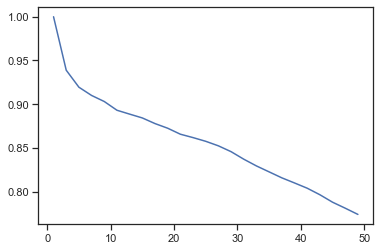

In [32]:
plt.plot(n_range, gs.cv_results_["mean_train_score"]);

Очевидно, что для $K=1$ на тренировочном наборе данных мы находим ровно ту же точку, что и нужно предсказать, и чем больше её соседей мы берём — тем меньше точность.
На тестовом наборе данных картина сильно интереснее:

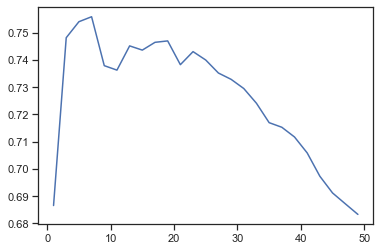

In [33]:
plt.plot(n_range, gs.cv_results_["mean_test_score"]);


Выходит, что сначала соседей слишком мало (высоко влияние выбросов), а затем количество соседей постепенно становится слишком велико, и среднее значение по этим соседям всё больше и больше оттягивает значение от истинного.
Проверим получившуюся модель:

In [34]:
reg = KNeighborsRegressor(**gs.best_params_)
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 0.25478754578754587
median_absolute_error: 0.2124285714285712
r2_score: 0.9226909598567912


In [ ]:

В целом получили примерно тот же результат. Очевидно, что данный метод и так показал достаточно хороший результат для данной выборки.

Построим кривую обучения:

In [35]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None):
    train_sizes=np.linspace(.1, 1.0, 5)

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

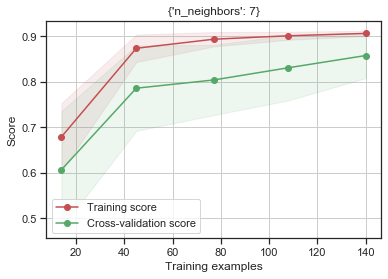

In [36]:
plot_learning_curve(reg, str(gs.best_params_), X, y,
                    cv=ShuffleSplit(n_splits=10));

Построим кривую валидации:

In [37]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name,
        param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean,
                 label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt


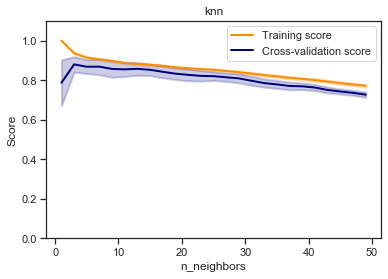

In [38]:
plot_validation_curve(KNeighborsRegressor(), "knn", X, y, 
                      param_name="n_neighbors", param_range=n_range, 
                      cv=ShuffleSplit(n_splits=10), scoring="r2");